# ***Proses instalasi SerpAPI pada module***

In [ ]:
pip install google-search-results

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from serpapi import GoogleSearch
from urllib.parse import *

# ***Menggunakan SerpAPI dengan Google Search Untuk Mencari Data ID Restoran di Kota Semarang***

In [ ]:
from serpapi import GoogleSearch
params = {
  "engine": "google_maps",
  "q": "restoran",
  "ll": "@-7.0245542,110.3470239,12z",
  "type": "search",
  "api_key": "1d95a6cbd844ff01c843ece1c01eb0620772cc4540c8b681ee6875854564cb75"
}

search = GoogleSearch(params)

mPosition = 0 # Angka indeks dari data
mNums = 5 # Batas jumlah data yang ditampilkan
local_results = []

while mPosition <= mNums:
  results = search.get_dict()

  for result in results["local_results"]:
    mPosition += 1
    
    if mPosition <= mNums:
      
      # Jika jumlah review kurang dari 150, maka jangan masukkan datanya
      if result["reviews"] < 150:
        mNums += 1
        continue
        
      # Append data sesuai dengan batas jumlah yang sudah ditentukan
      local_results.append({'title': result["title"],
                           'data_id': result["data_id"],
                           'reviews_total': result["reviews"]});

  if "next" in results.get("serpapi_pagination", {}):
    # Akan mengubah parameter dari 'GoogleSearch()' dengan isi parameter dari halaman selanjutnya
    search.params_dict.update(dict(parse_qsl(urlsplit(results.get("serpapi_pagination").get("next")).query)))

  else:
    break

https://serpapi.com/search


In [ ]:
data = {'restaurant_name':[],
        'name':[],
        'rating':[],
        'review':[]}

for lr in local_results:
  
  params = {
    "engine": "google_maps_reviews",
    "data_id": "",
    "api_key": "1d95a6cbd844ff01c843ece1c01eb0620772cc4540c8b681ee6875854564cb75"
  }
  
  params["data_id"] = lr['data_id']

  search = GoogleSearch(params)

  mPosition = 0 # Angka indeks dari data
  mNums = 50 # Batas jumlah data yang ditampilkan

  while mPosition <= mNums:
    results = search.get_dict()

    for result in results["reviews"]:
      mPosition += 1

      if mPosition <= mNums:
        # Append data sesuai dengan batas jumlah yang sudah ditentukan
        data['restaurant_name'].append(lr['title']);
        data['name'].append(result["user"]["name"]);
        data['rating'].append(result["rating"]);
        data['review'].append(result["snippet"]);

    if "next" in results.get("serpapi_pagination", {}):
      # Akan mengubah parameter dari 'GoogleSearch()' dengan isi parameter dari halaman selanjutnya
      search.params_dict.update(dict(parse_qsl(urlsplit(results.get("serpapi_pagination").get("next")).query)))

    else:
      break
    
review_original = data['review']

https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search


In [ ]:
import pandas as pd
df_original = pd.DataFrame(data)
df_original.to_csv('rev_preprocessing.csv', index=False)

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

# Warnings
import warnings
warnings.filterwarnings('ignore')

pd.pandas.set_option('display.max_columns', None)

In [ ]:
filename = "rev_preprocessing.csv"
df = pd.read_csv(filename, encoding = 'latin-1')
df.head()

,restaurant_name,name,rating,review
0,Pesta Keboen Restoran,Yakobus Adi,5.0,This is one of the unique restaurant in Semara...
1,Pesta Keboen Restoran,Harry WALUYO,4.0,The Semarang Keboen Party has a Semarang Tempo...
2,Pesta Keboen Restoran,Maulvi Nazir,5.0,This place is great.. suit for everyone who wa...
3,Pesta Keboen Restoran,erwin erwin,4.0,Nice old style resto with traditional food men...
4,Pesta Keboen Restoran,Nature Lover,5.0,A homy and comfortable place to have a gatheri...


In [ ]:
df.drop(columns = ['restaurant_name', 'name'], inplace = True)
df.columns = ['rating', 'review']
df.head()

,rating,review
0,5.0,This is one of the unique restaurant in Semara...
1,4.0,The Semarang Keboen Party has a Semarang Tempo...
2,5.0,This place is great.. suit for everyone who wa...
3,4.0,Nice old style resto with traditional food men...
4,5.0,A homy and comfortable place to have a gatheri...


# **EDA**

In [ ]:
#  Shape of the dataset, and breakdown of the classes
print(f"Input data has {len(df)} rows and {len(df.columns)} columns")
print(f"1.0 = {len(df[df['rating'] == 1.0])} rows")
print(f"2.0 = {len(df[df['rating'] == 2.0])} rows")
print(f"3.0 = {len(df[df['rating'] == 3.0])} rows")
print(f"4.0 = {len(df[df['rating'] == 4.0])} rows")
print(f"5.0 = {len(df[df['rating'] == 5.0])} rows")

Input data has 250 rows and 2 columns
1.0 = 5 rows
2.0 = 8 rows
3.0 = 21 rows
4.0 = 73 rows
5.0 = 143 rows


Number of null in label: 0
Number of null in text: 0


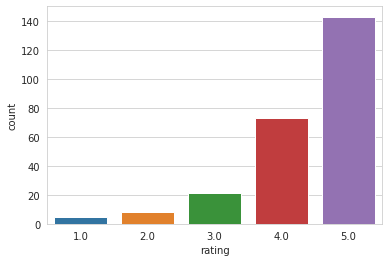

In [ ]:
# Missing values in the dataset
print("Number of null in label: {}".format(df['rating'].isnull().sum()))
print("Number of null in text: {}".format(df['review'].isnull().sum()))
sns.countplot(x='rating', data=df);

In [ ]:
df_ham = df[(df['rating'] == 5.0) | (df['rating'] == 4.0) | (df['rating'] == 3.0)]
df_spam = df[(df['rating'] == 2.0) | (df['rating'] == 1.0)]
#convert to list
ham_list=df_ham['review'].tolist()
spam_list= df_spam['review'].tolist()
filtered_spam = ("").join(spam_list) #convert the list into a string of spam
filtered_spam = filtered_spam.lower()
filtered_ham = ("").join(ham_list) #convert the list into a string of ham
filtered_ham = filtered_ham.lower()

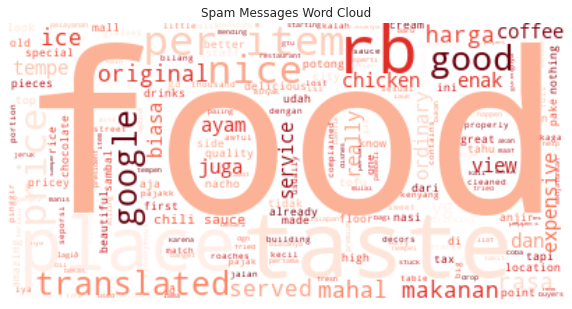

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Reds").generate(filtered_spam)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Spam Messages Word Cloud")
plt.show()

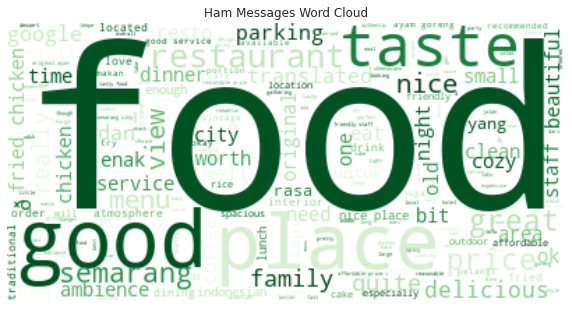

In [ ]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Greens").generate(filtered_ham)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Ham Messages Word Cloud")
plt.show()

# **Preprocessing the data**
## Cleaning the text

In [ ]:
import string
import re

In [ ]:
def clean_text(text):
    return re.sub('[^a-zA-Z]', ' ', text).lower()
df['cleaned_text'] = df['review'].apply(lambda x: clean_text(x))
df['label'] = df['rating'].map({5.0:0, 4.0:0, 3.0:0, 2.0:1, 1.0:1})

In [ ]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100
df['text_len'] = df['review'].apply(lambda x: len(x) - x.count(" "))
df['punct'] = df['review'].apply(lambda x: count_punct(x))
df.head()

,rating,review,cleaned_text,label,text_len,punct
0,5.0,This is one of the unique restaurant in Semara...,this is one of the unique restaurant in semara...,0,684,6.0
1,4.0,The Semarang Keboen Party has a Semarang Tempo...,the semarang keboen party has a semarang tempo...,0,212,3.8
2,5.0,This place is great.. suit for everyone who wa...,this place is great suit for everyone who wa...,0,114,7.0
3,4.0,Nice old style resto with traditional food men...,nice old style resto with traditional food men...,0,133,3.8
4,5.0,A homy and comfortable place to have a gatheri...,a homy and comfortable place to have a gatheri...,0,146,2.7


# **TOKENIZATION**

In [ ]:
def tokenize_text(text):
    tokenized_text = text.split()
    return tokenized_text
df['tokens'] = df['cleaned_text'].apply(lambda x: tokenize_text(x))
df.head()

,rating,review,cleaned_text,label,text_len,punct,tokens
0,5.0,This is one of the unique restaurant in Semara...,this is one of the unique restaurant in semara...,0,684,6.0,"[this, is, one, of, the, unique, restaurant, i..."
1,4.0,The Semarang Keboen Party has a Semarang Tempo...,the semarang keboen party has a semarang tempo...,0,212,3.8,"[the, semarang, keboen, party, has, a, semaran..."
2,5.0,This place is great.. suit for everyone who wa...,this place is great suit for everyone who wa...,0,114,7.0,"[this, place, is, great, suit, for, everyone, ..."
3,4.0,Nice old style resto with traditional food men...,nice old style resto with traditional food men...,0,133,3.8,"[nice, old, style, resto, with, traditional, f..."
4,5.0,A homy and comfortable place to have a gatheri...,a homy and comfortable place to have a gatheri...,0,146,2.7,"[a, homy, and, comfortable, place, to, have, a..."


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
def lemmatize_text(token_list):
    return " ".join([lemmatizer.lemmatize(token) for token in token_list if not token in set(all_stopwords)])

lemmatizer = nltk.stem.WordNetLemmatizer()
df['lemmatized_text'] = df['tokens'].apply(lambda x: lemmatize_text(x))
df.head()

,rating,review,cleaned_text,label,text_len,punct,tokens,lemmatized_text
0,5.0,This is one of the unique restaurant in Semara...,this is one of the unique restaurant in semara...,0,684,6.0,"[this, is, one, of, the, unique, restaurant, i...",one unique restaurant semarang located veteran...
1,4.0,The Semarang Keboen Party has a Semarang Tempo...,the semarang keboen party has a semarang tempo...,0,212,3.8,"[the, semarang, keboen, party, has, a, semaran...",semarang keboen party semarang tempo doeloe nu...
2,5.0,This place is great.. suit for everyone who wa...,this place is great suit for everyone who wa...,0,114,7.0,"[this, place, is, great, suit, for, everyone, ...",place great suit everyone want back netherland...
3,4.0,Nice old style resto with traditional food men...,nice old style resto with traditional food men...,0,133,3.8,"[nice, old, style, resto, with, traditional, f...",nice old style resto traditional food menu sem...
4,5.0,A homy and comfortable place to have a gatheri...,a homy and comfortable place to have a gatheri...,0,146,2.7,"[a, homy, and, comfortable, place, to, have, a...",homy comfortable place gathering family friend...


# Feature Extraction from Text
## Bag-Of-Words Model

In [ ]:
X = df[['lemmatized_text', 'text_len', 'punct']]
y = df['label']
print(X.shape)
print(y.shape)

(250, 3)
(250,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(175, 3)
(75, 3)
(175,)
(75,)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df = 0.5, min_df = 2) # ignore terms that occur in more than 50% documents and the ones that occur in less than 2
tfidf_train = tfidf.fit_transform(X_train['lemmatized_text'])
tfidf_test = tfidf.transform(X_test['lemmatized_text'])

X_train_vect = pd.concat([X_train[['text_len', 'punct']].reset_index(drop=True), 
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['text_len', 'punct']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head()

,text_len,punct,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493
0,101,4.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.128002,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.289727,0.0,0.0,0.000000,0.0,0.347836,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.300299,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.289727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.252762,0.0,0.0,0.0,0.0,0.194653,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.312803,0.0,0.0,0.0,0.0,0.154888,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.289727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.544983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

# Training different Classification models

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       0.00      0.00      0.00         3

    accuracy                           0.96        75
   macro avg       0.48      0.50      0.49        75
weighted avg       0.92      0.96      0.94        75



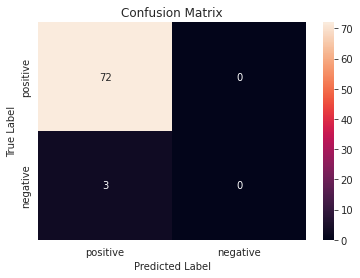

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train_vect, y_train)
naive_bayes_pred = classifier.predict(X_test_vect)

# Classification Report
print(classification_report(y_test, naive_bayes_pred))

# Confusion Matrix
class_label = ["positive", "negative"]
df_cm = pd.DataFrame(confusion_matrix(y_test, naive_bayes_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       0.00      0.00      0.00         3

    accuracy                           0.96        75
   macro avg       0.48      0.50      0.49        75
weighted avg       0.92      0.96      0.94        75



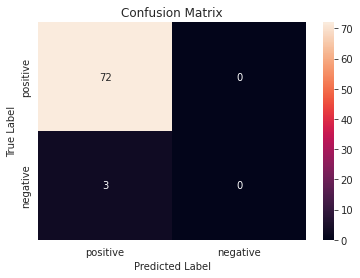

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=150)
classifier.fit(X_train_vect, y_train)
random_forest_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, random_forest_pred))

# Confusion Matrix
class_label = ["positive", "negative"]
df_cm = pd.DataFrame(confusion_matrix(y_test, random_forest_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       0.00      0.00      0.00         3

    accuracy                           0.96        75
   macro avg       0.48      0.50      0.49        75
weighted avg       0.92      0.96      0.94        75



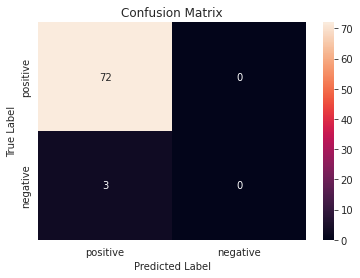

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_vect, y_train)
log_reg_pred = classifier.predict(X_test_vect)
# Classification report
print(classification_report(y_test, log_reg_pred))

# Confusion Matrix
class_label = ["positive", "negative"]
df_cm = pd.DataFrame(confusion_matrix(y_test, log_reg_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       0.00      0.00      0.00         3

    accuracy                           0.96        75
   macro avg       0.48      0.50      0.49        75
weighted avg       0.92      0.96      0.94        75



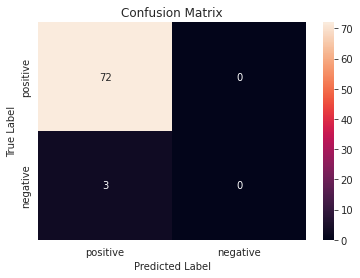

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train_vect, y_train)
svm_pred = classifier.predict(X_test_vect)
# Classification report
print(classification_report(y_test, svm_pred))

# Confusion Matrix
class_label = ["positive", "negative"]
df_cm = pd.DataFrame(confusion_matrix(y_test, svm_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       0.00      0.00      0.00         3

    accuracy                           0.96        75
   macro avg       0.48      0.50      0.49        75
weighted avg       0.92      0.96      0.94        75



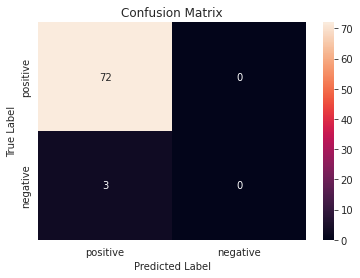

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train_vect, y_train)
knn_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, knn_pred))

# Confusion Matrix
class_label = ["positive", "negative"]
df_cm = pd.DataFrame(confusion_matrix(y_test, knn_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### The best performing algorithms so far seem to be Linear SVM, Random Forest and Logistic Regression Classifiers.
At this point, it might be worth to perform k-fold cross validation on each of these to estimate their skill on unseen data.

In [ ]:
from sklearn.model_selection import cross_val_score

models = [LogisticRegression(), RandomForestClassifier(n_estimators = 150), SVC(kernel = 'linear')]
names = ["Logistic Regression", "Random Forest", "SVM"]
for model, name in zip(models, names):
    print(name)
    for score in ["accuracy", "precision", "recall", "f1"]:
        print(f" {score} - {cross_val_score(model, X_train_vect, y_train, scoring=score, cv=10).mean()} ")

Logistic Regression
 accuracy - 0.9369281045751634 
 precision - 0.0 
 recall - 0.0 
 f1 - 0.0 
Random Forest
 accuracy - 0.9428104575163399 
 precision - 0.0 
 recall - 0.0 
 f1 - 0.0 
SVM
 accuracy - 0.9428104575163399 
 precision - 0.0 
 recall - 0.0 
 f1 - 0.0 


In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 10)
classifier.fit(tfidf_train, y_train)
classifier.score(tfidf_test, y_test)

0.96

In [ ]:
from flask import Flask,render_template,url_for,request
import pandas as pd 
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
# from sklearn.externals import joblib


app = Flask(__name__)

@app.route('/')
def home():
	return render_template('home.html')

@app.route('/predict',methods=['POST'])
def predict():
  df = pd.read_csv("rev_preprocessing.csv", encoding="latin-1")
  df.drop(columns = ['restaurant_name', 'name'], inplace = True)
  df.columns = ['rating', 'review']
  
  review_remove_translated = []
  reviews_dict = df.to_dict('list')

  for review in reviews_dict['review']:
    review_sep = review.split("(Translated by Google) ")
    
    # Jika terdapat (Translated by Google)
    if review_sep[0] == "":
      review_sep = ("".join(review_sep)).split("(Original)")
      review_sep = review_sep[0]
      review = "".join(review_sep)
      
    review_remove_translated.append(review)

  reviews_dict['review'] = review_remove_translated
  df = pd.DataFrame(reviews_dict)

  import string
  import re
  def clean_text(text):
      return re.sub('[^a-zA-Z]', ' ', text).lower()
  df['cleaned_text'] = df['review'].apply(lambda x: clean_text(x))
  df['label'] = df['rating'].map({5.0:0, 4.0:0, 3.0:0, 2.0:1, 1.0:1})

  def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100
  df['text_len'] = df['review'].apply(lambda x: len(x) - x.count(" "))
  df['punct'] = df['review'].apply(lambda x: count_punct(x))

  def tokenize_text(text):
    tokenized_text = text.split()
    return tokenized_text
  df['tokens'] = df['cleaned_text'].apply(lambda x: tokenize_text(x))

  import nltk
  from nltk.corpus import stopwords
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')

  def lemmatize_text(token_list):
    return " ".join([lemmatizer.lemmatize(token) for token in token_list if not token in set(all_stopwords)])

  lemmatizer = nltk.stem.WordNetLemmatizer()
  df['lemmatized_text'] = df['tokens'].apply(lambda x: lemmatize_text(x))

  X = df[['lemmatized_text', 'text_len', 'punct']]
  y = df['label']

  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
  

  from sklearn.feature_extraction.text import TfidfVectorizer
  tfidf = TfidfVectorizer(max_df = 0.5, min_df = 2) # ignore terms that occur in more than 50% documents and the ones that occur in less than 2
  tfidf_train = tfidf.fit_transform(X_train['lemmatized_text'])
  tfidf_test = tfidf.transform(X_test['lemmatized_text'])

  from sklearn.svm import SVC
  classifier = SVC(kernel = 'linear', random_state = 10)
  classifier.fit(tfidf_train, y_train)
  classifier.score(tfidf_test, y_test)

  if request.method == 'POST':
    message = request.form['message']
    data = [message]
    vect = tfidf.transform(data).toarray()
    my_prediction = classifier.predict(vect)
  return render_template('result.html',prediction = my_prediction)

if __name__ == '__main__':
	app.run(debug=True)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


OSError: ignored